<a href="https://colab.research.google.com/github/zinebzannouti/Statistics-With-Python/blob/main/1_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descriptive Statistics**
This notebook presents the descriptive statistics of the numerical and categorical variables through the measures of central tendency and measures of spread.
**Statistics is divided into two major areas:**

**Descriptive statistics:** describe and summarize data;
**Inferential statistics:** methods for using sample data to make general conclusions (inferences) about populations.

**This tutorial focuses on descriptive statistics of both numerical and categorical variables and is divided into two parts:**

**Measures of central tendency;**
**Measures of spread.**
In this section, we will be giving short numeric stats summaries concerning the different measures of central tendency and dispersion of the dataset.

let’s work on some practical examples through a descriptive statistics environment in Pandas.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv("sample.csv", sep=";")

In [4]:
# Print the data
df.head(10)

,Age,City
0,24,Paris
1,59,Toulouse
2,45,Montpellier
3,69,Bordeaux
4,21,Dijon
5,45,Marseille
6,65,Lille
7,52,Rennes
8,46,Grenoble
9,26,Marseille


In [5]:
# Before stats, a quick look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     118 non-null    int64 
 1   City    118 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


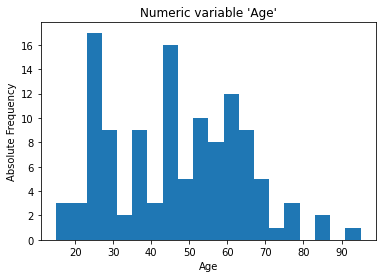

In [7]:
# Histogram
plt.hist(df.Age, bins=20)
plt.xlabel("Age")
plt.ylabel("Absolute Frequency")
plt.title("Numeric variable 'Age'")
plt.show()

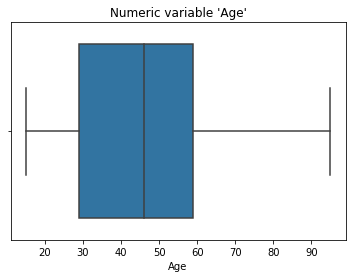

In [9]:
# Boxplot
sns.boxplot(x="Age", data=df, orient="h").set(xlabel="Age", title="Numeric variable 'Age'");

In [12]:
# Create a dataframe and display the 5-n summary stats
box = {"5-n summary": ["Age"],
           "Min": [df.Age.min()],
           "Q1": [df.Age.quantile(.25)],
           "Median": [df.Age.quantile(.5)],
           "Q3": [df.Age.quantile(.75)],
           "Max": [df.Age.max()]
}
plot = pd.DataFrame(box, columns=["5-n summary","Min","Q1","Median","Q3","Max"])
plot.set_index("5-n summary", inplace=True)

boxplot = plot.T
boxplot

5-n summary,Age
Min,15.0
Q1,29.0
Median,46.0
Q3,59.0
Max,95.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


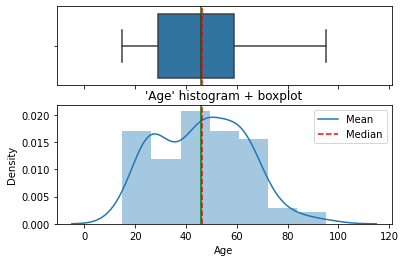

In [14]:
# Histogram + boxplot
age = df.Age
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.8, 1.2)})

mean=np.array(age).mean()
median=np.median(age)

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.title("'Age' histogram + boxplot")

ax_box.set(xlabel='')
plt.show()


# **1.1. Measures of Central Tendency**

In [15]:
# Mean
df.Age.mean()

46.25423728813559

In [16]:
# Median
df.Age.median()

46.0

**Which metric is more robust to outliers?**
The mean is the one to use with symmetrically distributed data, otherwise, use the median. However, an important property of the mean is that it includes every value in your data set as part of the calculation.

# **1.2. Measures of Spread**

In [17]:
# Standard deviation
df.Age.std()

17.194307565620715

In [18]:
# Variance
df.Age.var()

295.6442126611618

In [19]:
# Percentiles 2%%
df.Age.quantile(0.25)

29.0

In [20]:
# Percentile 75%
df.Age.quantile(0.75)

59.0

In [21]:
# In one go
df.Age.quantile(q=[.25, .75])

0.25    29.0
0.75    59.0
Name: Age, dtype: float64

In [22]:
# Minimum and Maximum
df.Age.min(), df.Age.max()

(15, 95)

# **1.3. Others**

In [24]:
# Size (number of rows)
df.Age.count()

118

In [25]:
# Number of uniques (total distinct)
df.Age.nunique()

44

In [26]:
# Uniques (distinct)
df.Age.unique()

array([24, 59, 45, 69, 21, 65, 52, 46, 26, 35, 42, 23, 25, 62, 51, 22, 44,
       55, 53, 41, 48, 57, 58, 49, 56, 36, 15, 54, 28, 29, 61, 27, 75, 73,
       19, 85, 76, 38, 34, 67, 84, 68, 95, 64])

# **2. Categorical Variable**

The categorical variable we are going to analyze is city. Let’s plot a bar chart and get a visual observation of the variable.

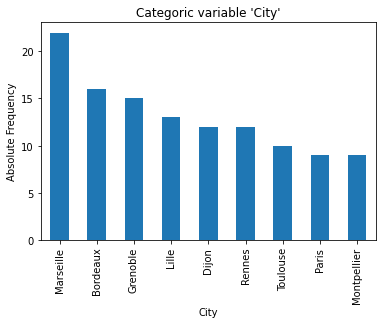

In [28]:
# Bar plot
df.City.value_counts().plot.bar()
plt.xlabel("City")
plt.ylabel("Absolute Frequency")
plt.title("Categoric variable 'City'")
plt.show()

# **2.1. Measures of Central Tendency**

In [29]:
# Mode
df.City.mode()[0]

'Marseille'

# **2.2. Measures of spread**

In [30]:
# Number of uniques
df.City.nunique()

9

In [31]:
# Uniques (distinct)
df.City.unique()

array(['Paris', 'Toulouse', 'Montpellier', 'Bordeaux', 'Dijon',
       'Marseille', 'Lille', 'Rennes', 'Grenoble'], dtype=object)

In [32]:
# Most frequent unique (value count)
df.City.value_counts().head(1)

Marseille    22
Name: City, dtype: int64

# **2.3. Others**

In [33]:
# Size (number of rows)
df.City.count()

118

In [34]:
# % of the highest unique (fraction of the 
# most common unique in regards to all the others)
p = df.City.value_counts(normalize=True)[0]
print(f"{p:.1%}")

18.6%


The **describe()** method shows the descriptive statistics gathered in one table. By default, stats for numeric data. The result is represented as a pandas dataframe.


In [35]:
# Numeric stats
df.describe()

,Age
count,118.000000
mean,46.254237
std,17.194308
min,15.000000
25%,29.000000
50%,46.000000
75%,59.000000
max,95.000000


In [36]:
# Adding other non-standard values 
# for instance, the 'variance'
describe_var = df.describe()
describe_var.append(pd.Series(df.var(), name='variance'))

<ipython-input-36-8d98d71136a3>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  describe_var.append(pd.Series(df.var(), name='variance'))


,Age
count,118.000000
mean,46.254237
std,17.194308
min,15.000000
25%,29.000000
50%,46.000000
75%,59.000000
max,95.000000
variance,295.644213


In [37]:
# Displaying categorical data
df.describe(include="O")

# The same as:
# df.describe(exclude=['float64','int64'])
# df.describe(include=[np.object])

,City
count,118
unique,9
top,Marseille
freq,22


In [38]:
# By passing the parameter include='all'
# displays both numeric and categoric 
# variables at once
df.describe(include="all")

,Age,City
count,118.000000,118
unique,NaN,9
top,NaN,Marseille
freq,NaN,22
mean,46.254237,NaN
std,17.194308,NaN
min,15.000000,NaN
25%,29.000000,NaN
50%,46.000000,NaN
75%,59.000000,NaN
